# Assigment 1: Data Visualization

In [1]:
#Import libraries
import seaborn as sns #visualizarion library
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np
import datetime as dt

import warnings
warnings.filterwarnings("ignore")
from matplotlib.cbook import boxplot_stats
from datetime import datetime, timedelta

## 1.  Flight Price

### Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?

In [2]:
#Import the dataset 
df=pd.read_excel('flight_price.xlsx')

In [3]:
#numbers of rows and columns 
num_rows, num_columns = df.shape

In [4]:
#Answer:
print("\033[1;34m" + f"\033[1mAnswer: The dataset has {num_rows} rows and {num_columns} columns.\033[0m" + "\033[0m")

Answer: The dataset has 10683 rows and 11 columns.


Before addressing any questions regarding the dataset, I will first explore and perform necessary data cleaning procedures to ensure the data's quality and reliability.

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


**Note:** 
-  All data are objects data type, they need to be transform to the proper data type.
-  The columns "Route", and "Total_Stops" has one null.

In [6]:
# Convert the date columns to datetime
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], dayfirst=True)

In [7]:
# Transform "Departure Time" to Hour and Minute
df['Dep_hour']=df['Dep_Time'].str.split(':').str[0]
df['Dep_mins']=df['Dep_Time'].str.split(':').str[1]
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_hour,Dep_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,05,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,09,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,18,05
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,16,50


In [8]:
# Transform"Arrival_Time" to Hour and Minute
df['Arrival-hour']=df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[0]
df['Arrival-mins']=df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[1]
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_hour,Dep_mins,Arrival-hour,Arrival-mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,22,20,01,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,05,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,09,25,04,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,18,05,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,16,50,21,35


In [9]:
# Dropping the original column "Dep_Time" and "Arrival_Time"
df.drop("Dep_Time", axis=1, inplace=True)
df.drop("Arrival_Time", axis=1, inplace=True)

In [10]:
# Function to transform Duration to minutes and dropping the original column
def convert_into_minutes(Duration):
    total_minutes=0
    for i in Duration.split():
        if 'h' in i:
            total_minutes+=int(i.replace('h',''))*60
        if 'm' in i:
            total_minutes+=int(i.replace('m',''))
    return total_minutes

In [11]:
df['Duration_min']=df['Duration'].apply(convert_into_minutes)
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_hour,Dep_mins,Arrival-hour,Arrival-mins,Duration_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,22,20,01,10,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,05,50,13,15,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,09,25,04,25,1140


In [12]:
# Dropping the original column "Duration"
df.drop("Duration", axis=1, inplace=True)

In [13]:
# Dropping "Additional_info" that does not have relevant information
df.drop("Additional_Info", axis=1, inplace=True)

In [14]:
# Exploring Airline Distribution:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

### Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution

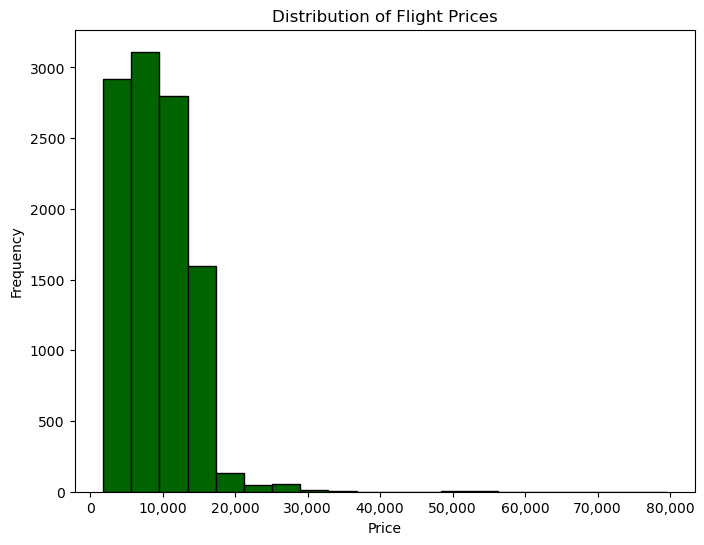

In [15]:
# Create a histogram for the 'Price' column to visualize the distribution
plt.figure(figsize=(8, 6))
plt.hist(df['Price'], bins=20, color='#006400', edgecolor='black')
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))# Add comma separators to the x-axis ticks
plt.show()

### Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [16]:
df.describe()

,Price,Duration_min
count,10683.000000,10683.000000
mean,9087.064121,643.093232
std,4611.359167,507.862001
min,1759.000000,5.000000
25%,5277.000000,170.000000
50%,8372.000000,520.000000
75%,12373.000000,930.000000
max,79512.000000,2860.000000


In [17]:
min_price = df['Price'].min()
max_price = df['Price'].max()

print("\033[1;34m" + f"\033[1mAnswer: The minimun price is {min_price} rows and and the maximum price is {max_price}.\033[0m" + "\033[0m")

Answer: The minimun price is 1759 rows and and the maximum price is 79512.


### Q4.How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.

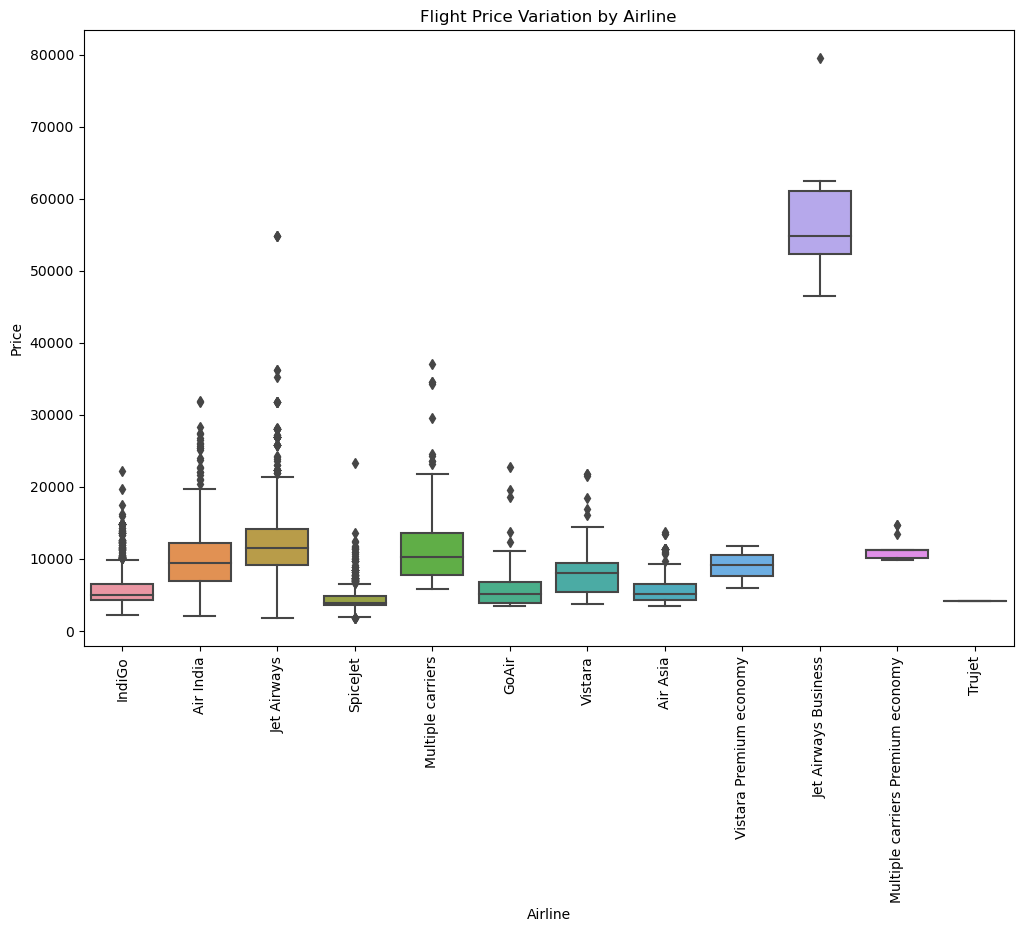

In [18]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Airline',y='Price',data=df)
plt.xticks(rotation=90)

plt.title("Flight Price Variation by Airline")
plt.show()

### Q5.Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

To identify potential outliers in the dataset, I consider not only the "Airline" but also the source and destination as a proxy for "Price
" because prices can vary depending on the route. Utilizing boxplots for these variables will help us visualize any unusual price patterns across different destinations and airlines.

In [19]:
# New column "Sou-Dest" joining  the 3 first and last letters of "Route" that identify the airports
df['Sou-Dest']=df['Route'].str[:3]+'-'+df['Route'].str[-3:]
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Price,Dep_hour,Dep_mins,Arrival-hour,Arrival-mins,Duration_min,Sou-Dest
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,non-stop,3897,22,20,01,10,170,BLR-DEL
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,7662,05,50,13,15,445,CCU-BLR


In [20]:
# Exploring Source-destination:
df['Sou-Dest'].value_counts()

DEL-COK    4536
CCU-BLR    2871
BLR-DEL    2197
BOM-HYD     697
MAA-CCU     381
Name: Sou-Dest, dtype: int64

There are only 5 routes. For a better analyze I will add the names of thisn airports.

In [21]:
df.groupby(['Sou-Dest', 'Source', 'Destination'])['Airline'].count().reset_index().sort_values(by='Airline', ascending=False)

,Sou-Dest,Source,Destination,Airline
4,DEL-COK,Delhi,Cochin,4536
3,CCU-BLR,Kolkata,Banglore,2871
0,BLR-DEL,Banglore,Delhi,1265
1,BLR-DEL,Banglore,New Delhi,932
2,BOM-HYD,Mumbai,Hyderabad,697
5,MAA-CCU,Chennai,Kolkata,381


**Note:** 
-  According to the data Delhi and New Delhi refer to the same airport.

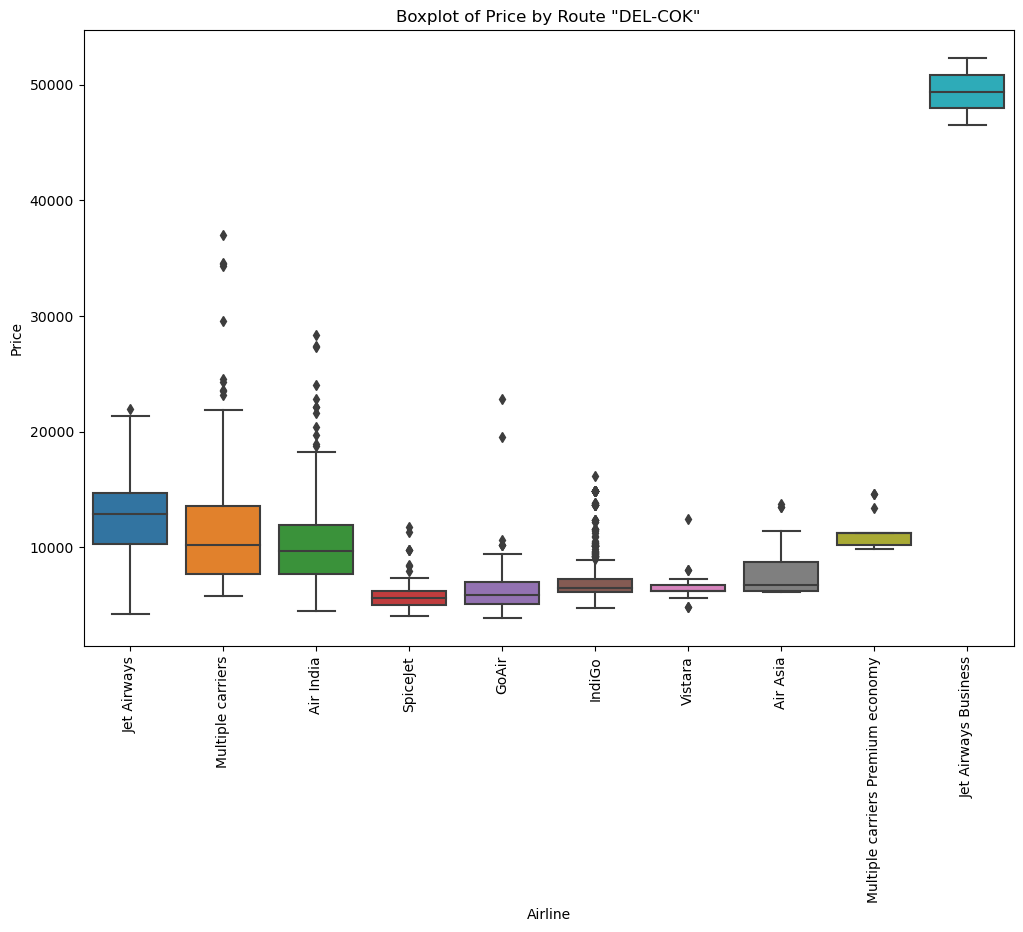

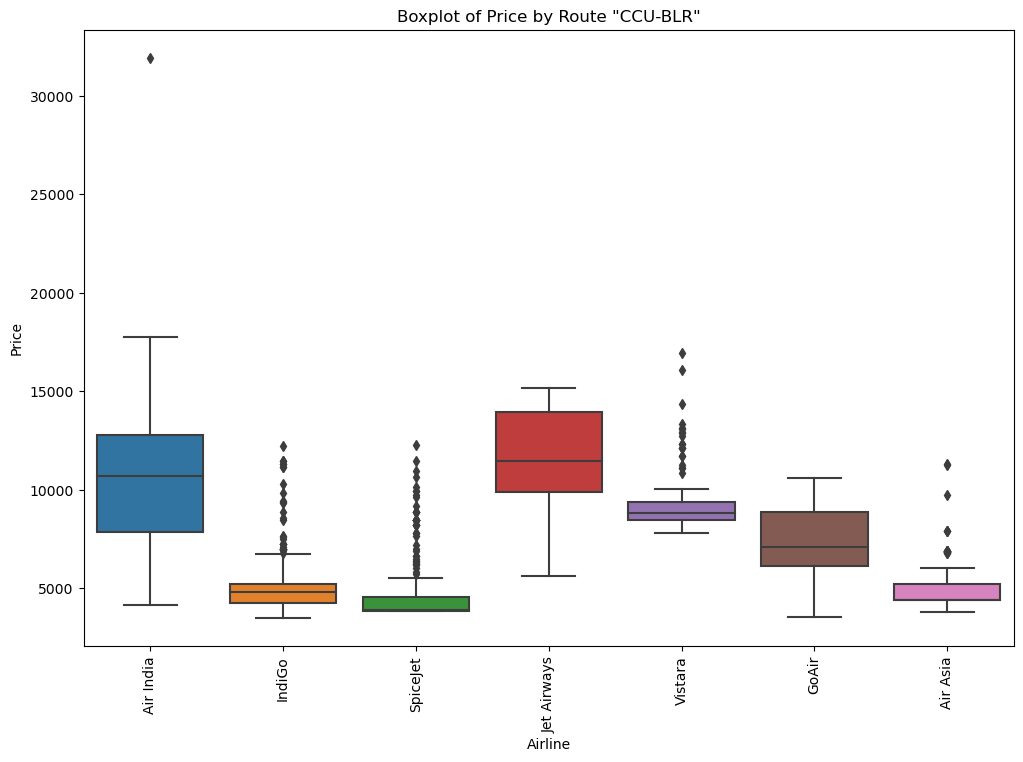

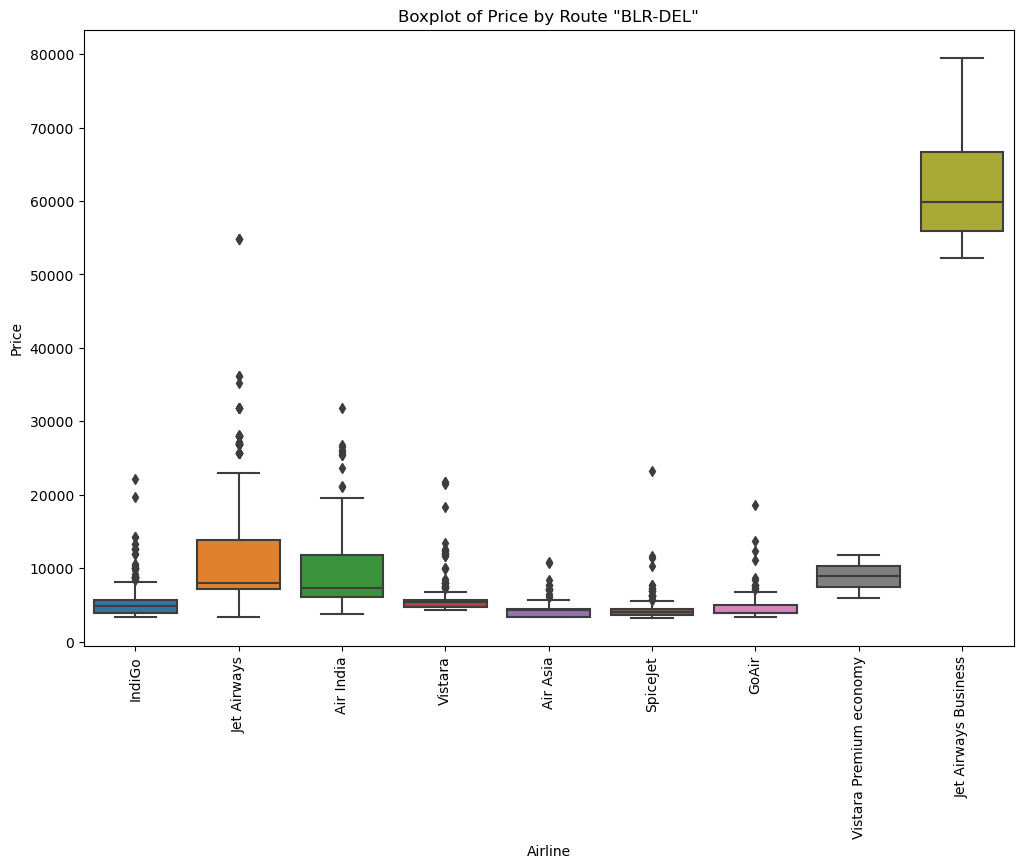

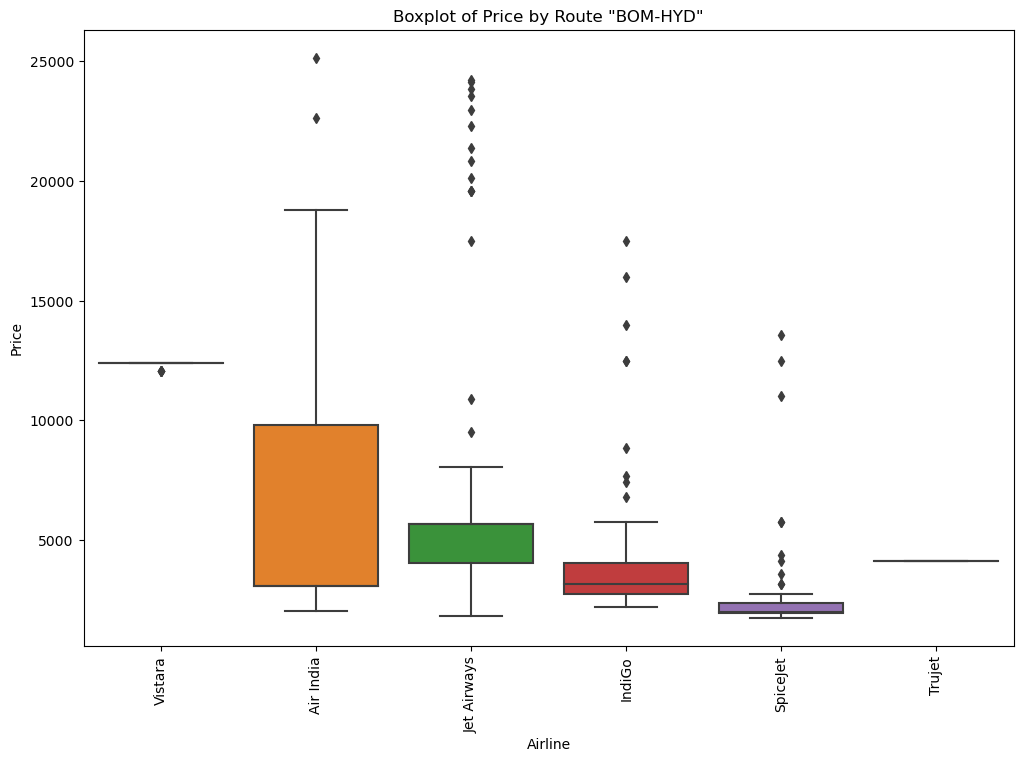

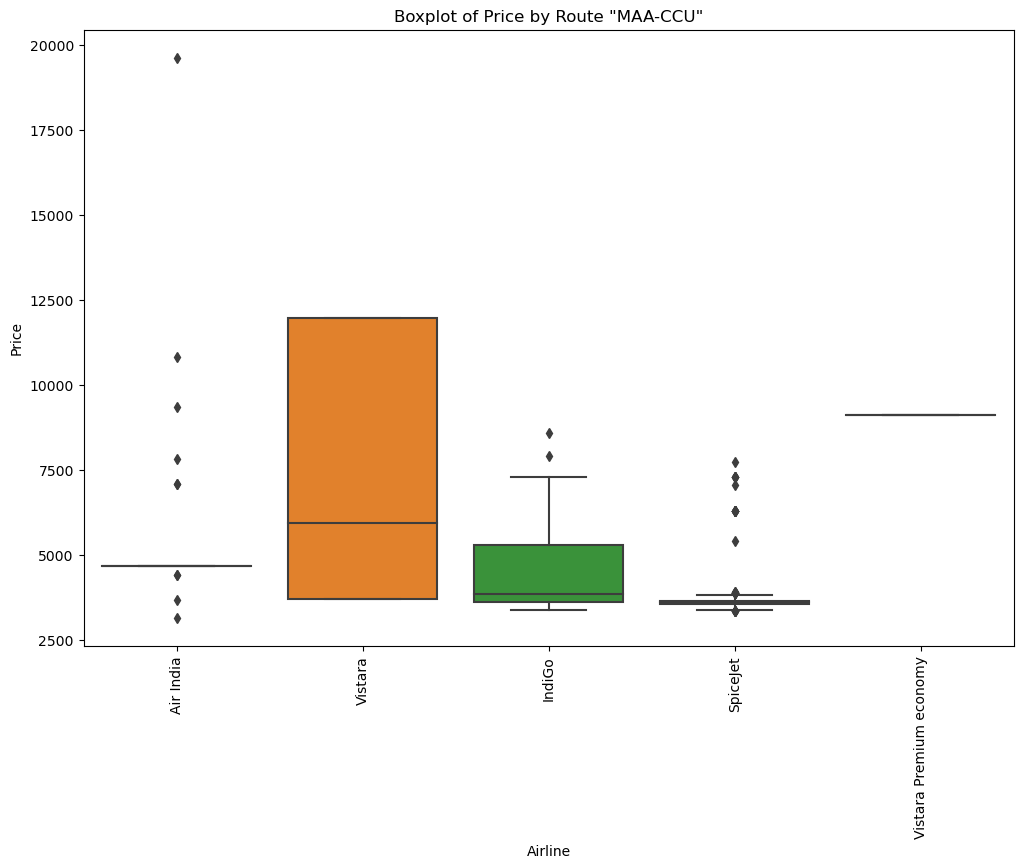

In [22]:
# Boxplot for 'Price' grouped by Airline and the differents "Sou-Dest"

route_list = ['DEL-COK', 'CCU-BLR', 'BLR-DEL', 'BOM-HYD', 'MAA-CCU']
def plot_boxplots_for_routes(df, route_list):
    for route in route_list:
        data = df.loc[df['Sou-Dest'] == route]
        
        plt.figure(figsize=(12, 8))
        sns.boxplot(x='Airline', y='Price', data=data)
        plt.title(f'Boxplot of Price by Route "{route}"')
        plt.xlabel('Airline')
        plt.ylabel('Price')
        plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
        plt.show()

plot_boxplots_for_routes(df, route_list)

In [23]:
def find_outliers_for_routes(df, route_list):
    all_outliers = pd.DataFrame()
    
    for route in route_list:
        data = df.loc[df['Sou-Dest'] == route]
        
        # Calculating quartiles and IQR
        q1 = data['Price'].quantile(0.25)
        q3 = data['Price'].quantile(0.75)
        iqr = q3 - q1

        # Determining outliers
        outliers_below = data.loc[data['Price'] < q1 - 1.5 * iqr]
        outliers_above = data.loc[data['Price'] > q3 + 1.5 * iqr]

        # Combining outliers
        outliers = pd.concat([outliers_below, outliers_above])
        
        all_outliers = pd.concat([all_outliers, outliers])

    all_outliers.sort_values(by=['Airline', 'Price'], ascending=False, inplace=True)
    
    return all_outliers

# Example usage:
outliers_df = find_outliers_for_routes(df, route_list)
outliers_df

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Price,Dep_hour,Dep_mins,Arrival-hour,Arrival-mins,Duration_min,Sou-Dest
7657,Vistara Premium economy,2019-03-01,Chennai,Kolkata,MAA → CCU,non-stop,9125,07,05,09,20,135,MAA-CCU
5162,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,non-stop,21730,21,10,00,05,175,BLR-DEL
9303,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,non-stop,21730,19,40,22,20,160,BLR-DEL
6526,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,non-stop,21520,07,00,09,40,160,BLR-DEL
5879,Vistara,2019-03-01,Banglore,New Delhi,BLR → AMD → DEL,1 stop,18387,06,40,21,55,915,BLR-DEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9305,Air India,2019-03-12,Mumbai,Hyderabad,BOM → DEL → HYD,1 stop,10943,21,00,19,25,1345,BOM-HYD
8846,Air India,2019-03-03,Chennai,Kolkata,MAA → CCU,non-stop,10810,11,40,13,55,135,MAA-CCU
4117,Air India,2019-03-06,Mumbai,Hyderabad,BOM → MAA → HYD,1 stop,10366,05,55,22,00,965,BOM-HYD
9577,Air India,2019-03-06,Chennai,Kolkata,MAA → CCU,non-stop,9340,11,40,13,55,135,MAA-CCU


**Note**:In the context of 10,683 data points, having 307 outliers indicates a significant number . Therefore, I will examine the outliers for routes associated with these instances to determine their potential as outliers.

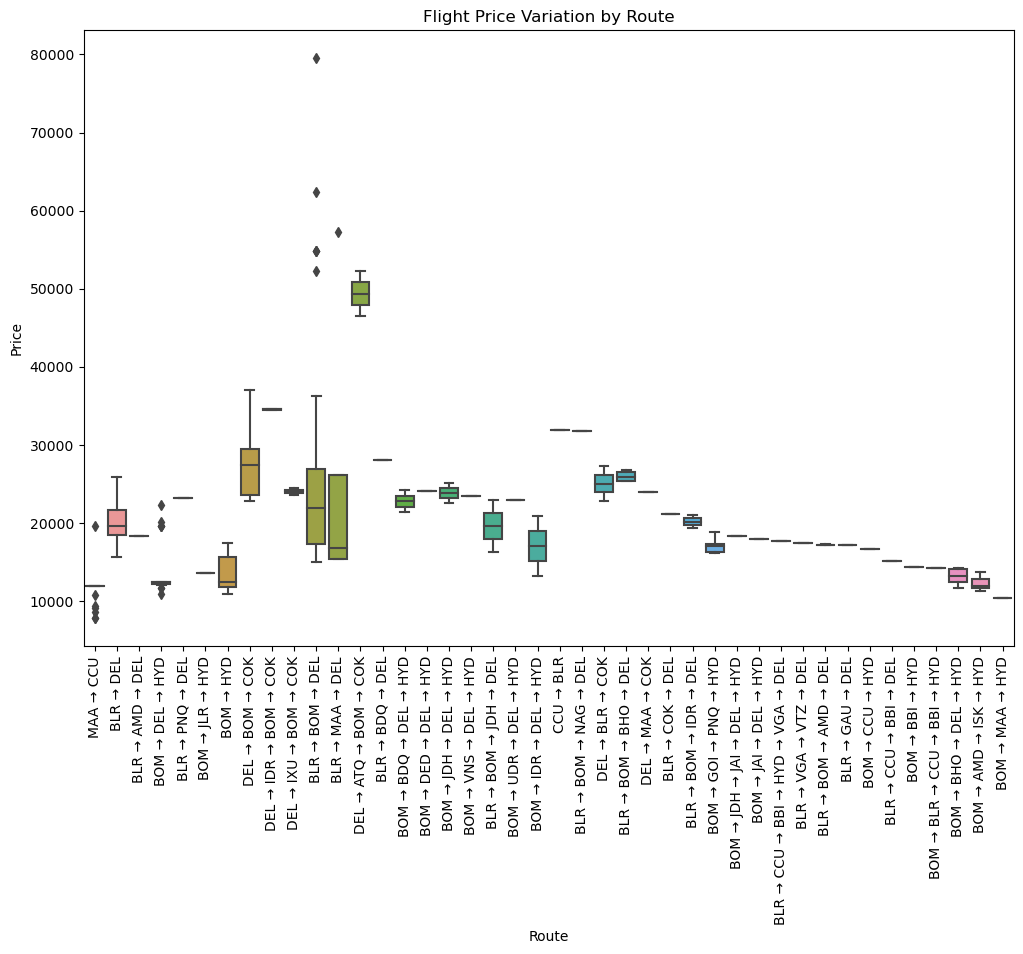

In [24]:
#Bloxplot using the completely route including stops
plt.figure(figsize=(12,8))
sns.boxplot(x='Route',y='Price',data=outliers_df)
plt.xticks(rotation=90)

plt.title("Flight Price Variation by Route")
plt.show()

In [25]:
# Calculating quartiles and IQR
q1 = outliers_df['Price'].quantile(0.25)
q3 = outliers_df['Price'].quantile(0.75)
iqr = q3 - q1

# Determining outliers
outliers_below = outliers_df.loc[outliers_df['Price'] < q1 - 1.5 * iqr]
outliers_above = outliers_df.loc[outliers_df['Price'] > q3 + 1.5 * iqr]

# Combining outliers
outliers = pd.concat([outliers_below, outliers_above])

outliers.sort_values(by=['Airline','Price'], ascending=False)

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Price,Dep_hour,Dep_mins,Arrival-hour,Arrival-mins,Duration_min,Sou-Dest
2924,Jet Airways Business,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,1 stop,79512,05,45,11,25,340,BLR-DEL
5372,Jet Airways Business,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,1 stop,62427,05,45,12,25,400,BLR-DEL
10364,Jet Airways Business,2019-03-01,Banglore,New Delhi,BLR → MAA → DEL,1 stop,57209,09,45,14,25,280,BLR-DEL
9715,Jet Airways Business,2019-03-06,Delhi,Cochin,DEL → ATQ → BOM → COK,2 stops,52285,20,05,04,25,500,DEL-COK
657,Jet Airways Business,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,1 stop,52229,05,45,10,45,300,BLR-DEL
7351,Jet Airways Business,2019-03-03,Delhi,Cochin,DEL → ATQ → BOM → COK,2 stops,46490,20,05,04,25,500,DEL-COK
1478,Jet Airways,2019-03-18,Banglore,New Delhi,BLR → BOM → DEL,1 stop,54826,18,40,00,45,365,BLR-DEL
2618,Jet Airways,2019-03-18,Banglore,New Delhi,BLR → BOM → DEL,1 stop,54826,22,50,05,05,375,BLR-DEL
5439,Jet Airways,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,1 stop,54826,16,55,23,00,365,BLR-DEL


**Answer:** Through the boxplot analysis, I've identified 9 instances that appear to deviate significantly from the majority of the data points. These potential outliers could impact our analysis by skewing statistical measures or influencing the conclusions drawn from the data. Therefore, it's essential to carefully examine these outliers to determine the most appropriate treatment. Ignoring or mishandling outliers could lead to biased results or misinterpretations of the data, potentially affecting the validity of our analysis.

### Q6.You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?

In [28]:
#Extract Year and Month
df['Year'] = df['Date_of_Journey'].dt.year
df['Month'] = df['Date_of_Journey'].dt.strftime('%B')
data = df.groupby(['Year', 'Month']).size().reset_index(name='Total')

data = data.sort_values('Month', key=lambda x: pd.to_datetime(x, format='%B').dt.month)
data.head()


,Year,Month,Total
2,2019,March,2724
0,2019,April,1079
3,2019,May,3466
1,2019,June,3414


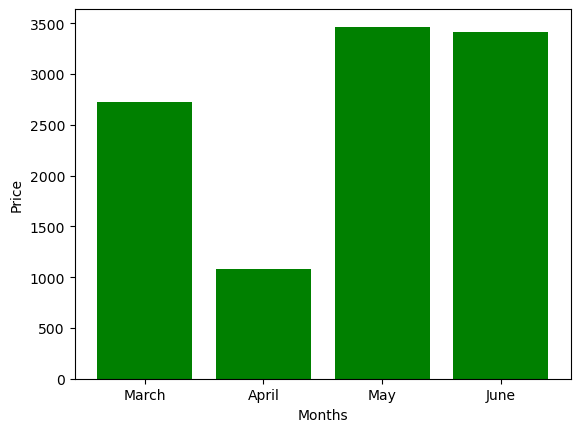

In [29]:
plt.bar(data['Month'], data['Total'], color='Green')
plt.xlabel('Months')
plt.ylabel('Price')
plt.show()

### Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?

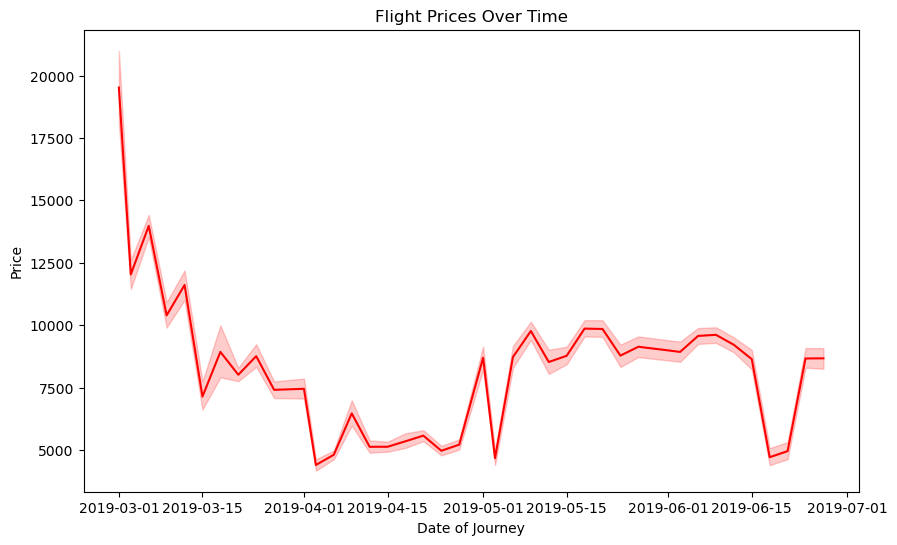

In [30]:
#The first visualization I wil fo is a Time Series Plot to see the Flight prices over time.

# Time Series Plot - Flight prices over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date_of_Journey', y='Price', data=df, color='Red')
plt.title('Flight Prices Over Time')
plt.xlabel('Date of Journey')
plt.ylabel('Price')
plt.show()

**Note:** From the time series plot, it's clear that flight prices experience a significant drop during March and April. This pattern suggests a seasonal trend or market dynamics, highlighting a favorable period for travelers to find lower-priced flights.

###  Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?


I will analyze "Route" and "Duration_min" features, they are criticall as they directly impact flight prices.  The route choice affects costs due to factors like distance and competition, with longer or multi-stop routes often leading to higher prices. Flight duration, in minutes, also plays a significant role, with longer flights incurring higher expenses like fuel and crew costs. Airlines adjust prices accordingly, considering passenger preferences for shorter durations. Understanding these features helps airlines optimize pricing and services to stay competitive while maximizing revenue.

In [31]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Price,Dep_hour,Dep_mins,Arrival-hour,Arrival-mins,Duration_min,Sou-Dest,Year,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,non-stop,3897,22,20,01,10,170,BLR-DEL,2019,March
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,7662,05,50,13,15,445,CCU-BLR,2019,May


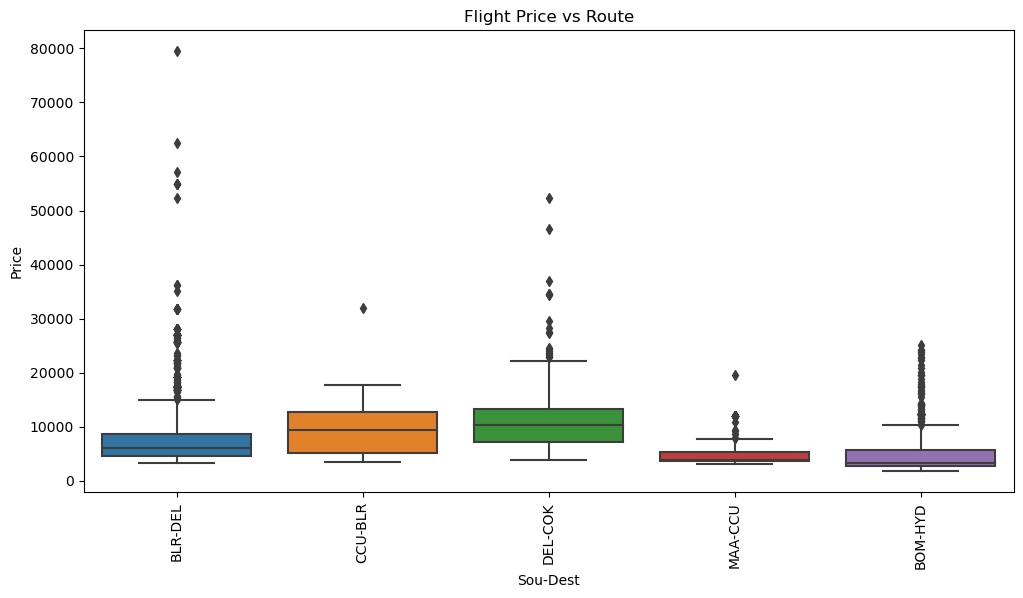

In [32]:
# Analyze "Route" and "Duration_min" features
plt.figure(figsize=(12, 6))

# Analyzing the impact of route on flight prices
sns.boxplot(x='Sou-Dest', y='Price', data=df)
plt.xticks(rotation=90)
plt.title('Flight Price vs Route')
plt.show()

Correlation coefficient between Duration and Price: 0.5063714821960478


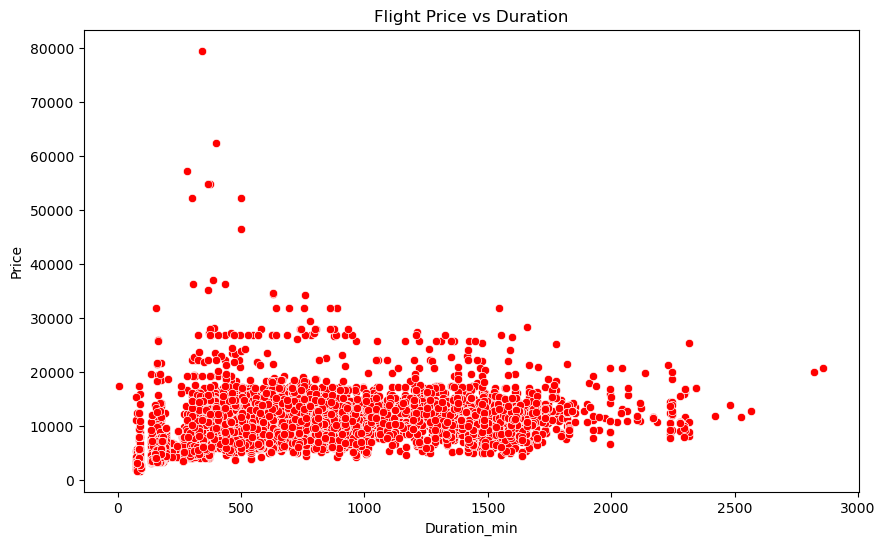

In [33]:
# Analyzing the impact of duration on flight prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration_min', y='Price', data=df, color='Red')
plt.title('Flight Price vs Duration')

# Calculating correlation coefficient
correlation = df['Duration_min'].corr(df['Price'])
print("Correlation coefficient between Duration and Price:", correlation)

plt.show()

**Note:** The correlation coefficient of 0.5086 between price and duratoin means there is a moderate possitive corelation. This indicates that as the duration of the flight (in minutes) increases, the price tends to increase as well, but not extremely strongly.

## Google Playstore

### Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?

In [34]:
#Import data from github
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')


In [35]:
#numbers of rows and columns 
num_rows, num_columns = df.shape

In [36]:
#Answer:
print("\033[1;34m" + f"\033[1mAnswer: The dataset has {num_rows} rows and {num_columns} columns.\033[0m" + "\033[0m")

Answer: The dataset has 10841 rows and 13 columns.


Before addressing any questions regarding the dataset, I will first explore and perform necessary data cleaning procedures to ensure the data's quality and reliability.

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [38]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [39]:
#df['Reviews']=df['Reviews'].astype('int') this get an erorr so we use the next code to identify the amount of rows numeric
df['Reviews'].str.isnumeric().sum()

10840

In [40]:
#Repleace the one that is not numeric
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [41]:
df['Reviews']=df['Reviews'].str.replace('3.0M','3000000')

In [42]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [43]:
# Dropping the row with Installs = Free so it is possible to transform to integer
df = df.drop(df[df['Installs'] == 'Free'].index)

In [44]:
# Removing the caracheres from Installs and price to transform to int or float
chars_to_remove = [',','+','$','Free']
cols = ['Installs', 'Price']

for i in cols:
    for j in chars_to_remove:
        df[i] = df[i].str.replace(j,'')

# Converting the columns to the correct data types
df['Installs'] = df['Installs'].astype(int)
df['Price'] = df['Price'].astype(float)


In [45]:
# Converting the Last Updated column to datetime   
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

#Extracting the day, month and year from the Last Updated column
df['day'] = df['Last Updated'].dt.day
df['month'] = df['Last Updated'].dt.month
df['year'] = df['Last Updated'].dt.year


In [46]:
# Dropping duplicates
df.drop_duplicates(subset=['App'], inplace=True, keep='last')

In [47]:
# Transforming the Size column to numeric
def convert_size(size):
    if 'M' in size:
        return int(float(size.replace('M',''))*1000)
    elif 'k' in size:
        return float(size.replace('k',''))
    elif 'Varies with device' in size:
        return np.nan
    else:
        return np.nan
    
df['Size'] = df['Size'].apply(convert_size)

df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0.0,Everyone,Art & Design,2017-03-26,1.0,2.3 and up,26,3,2017


In [48]:
#Let's see the data types
df.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                   object
Size                     float64
Installs                   int32
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
day                        int64
month                      int64
year                       int64
dtype: object

### Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.

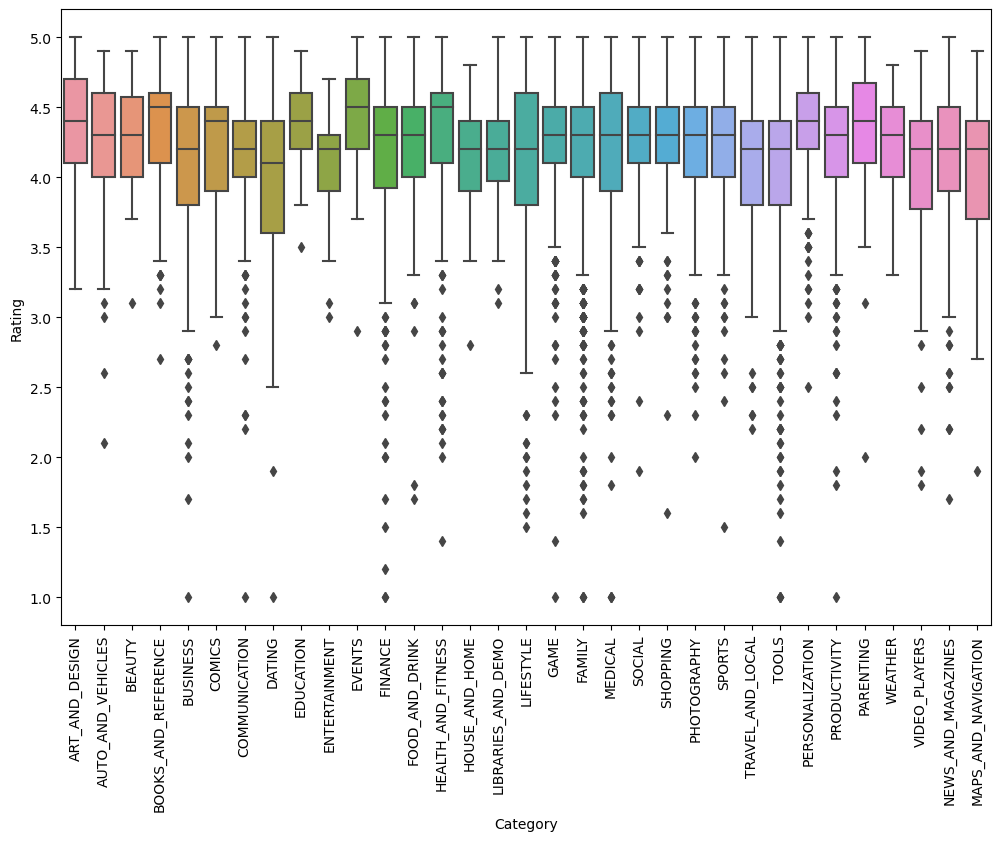

In [49]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x="Category", y="Rating")
plt.xticks(rotation=90)
plt.show()

### Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.

In [50]:
df.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
day                  0
month                0
year                 0
dtype: int64

**Answer:** Yes, there are missing values in the dataset, particularly in columns such as 'Rating' (1463 missing), 'Size' (1227 missing), 'Type' (1 missing), 'Current Ver' (8 missing), and 'Android Ver' (2 missing).The missing values, especially in the 'Rating' and 'Size' columns, might mess up the analysis. We rely on these to understand how users rate apps and their size preferences. If we don't handle these gaps properly, our findings might not be accurate. It's important to deal with them, maybe by using the media or median, or removing them. 

### Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.

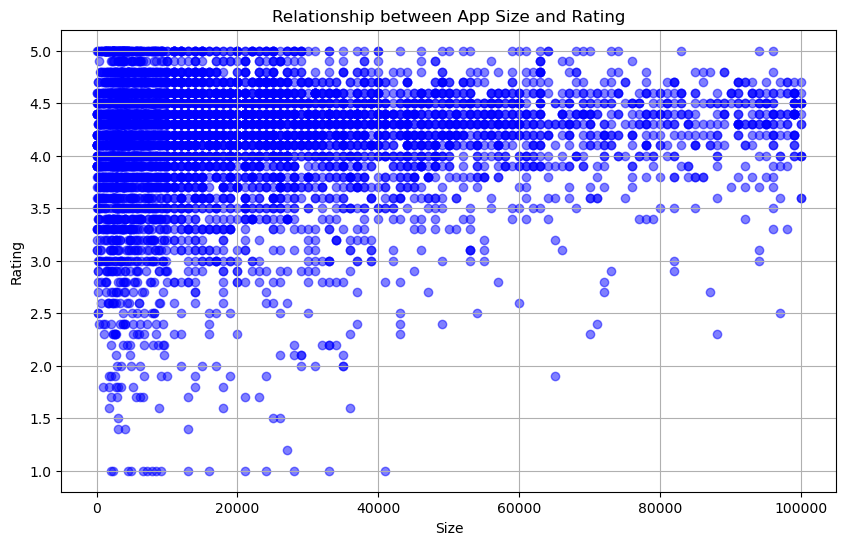

In [51]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Size'], df['Rating'], color='blue', alpha=0.5)  # Change color to blue
plt.title('Relationship between App Size and Rating')
plt.xlabel('Size')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

In [52]:
# Calculating correlation coefficient
correlation = df['Size'].corr(df['Rating'])
print("Correlation coefficient between Size and Rating:", correlation)

Correlation coefficient between Size and Rating: 0.06284274885743825


**Note:** The correlation of 0.062 is very weak. Just looking at the app size isn't enough to guess its rating accurately. There might be other factors that play a more significant role in determining app ratings.

### Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type

In [53]:
# Grouping the data by app type and calculating the average price for each type
df.groupby('Type')['Price'].mean()


Type
Free     0.000000
Paid    14.055902
Name: Price, dtype: float64

**Note:** The type of app is only "free" or "paid" and for free it does not have a price so it does not make sense to compare this feature.For this question I will analyze the "Content Rating"

In [54]:
data = df.groupby('Content Rating')["Price"].mean().reset_index().rename(columns={"Price": "Avg. Price"})
data

,Content Rating,Avg. Price
0,Adults only 18+,0.000000
1,Everyone,1.227388
2,Everyone 10+,0.433851
3,Mature 17+,0.259847
4,Teen,0.633475
5,Unrated,0.000000


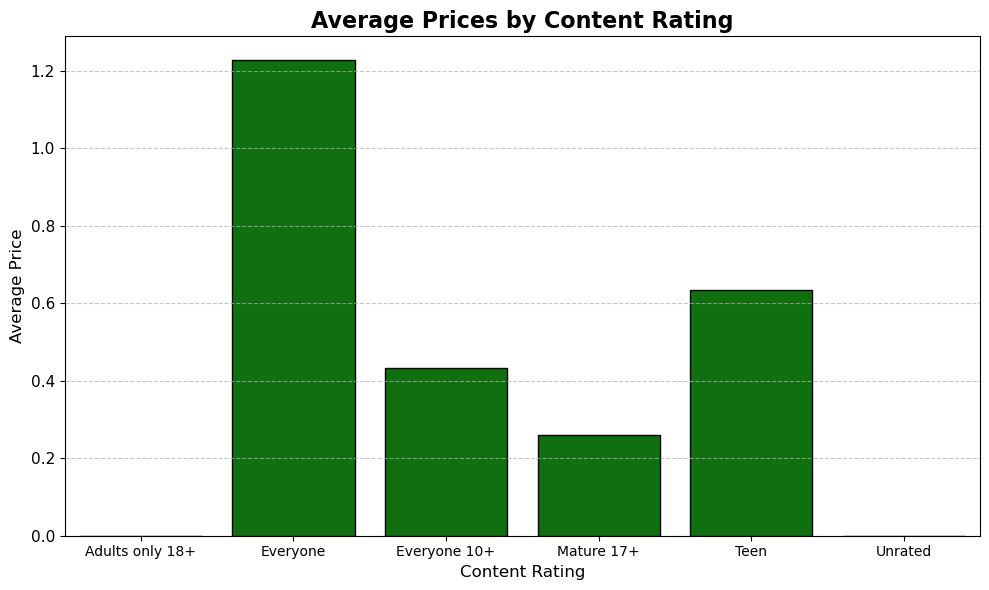

In [55]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x="Content Rating", y="Avg. Price",  color='green', edgecolor='black')

plt.title('Average Prices by Content Rating', fontsize=16, fontweight='bold')
plt.xlabel('Content Rating', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.

In [59]:
# Creating a frequecy table  for the number of installs
top_10= df.sort_values('Installs', ascending=False).head(10)
top_10

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
4153,Hangouts,COMMUNICATION,4.0,3419464,NaN,1000000000,Free,0.0,Everyone,Communication,2018-07-21,Varies with device,Varies with device,21,7,2018
9844,Google News,NEWS_AND_MAGAZINES,3.9,878065,13000.0,1000000000,Free,0.0,Teen,News & Magazines,2018-08-01,5.2.0,4.4 and up,1,8,2018
4104,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,1,8,2018
4234,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,3,8,2018
3928,YouTube,VIDEO_PLAYERS,4.3,25623548,NaN,1000000000,Free,0.0,Teen,Video Players & Editors,2018-08-02,Varies with device,Varies with device,2,8,2018
3943,Facebook,SOCIAL,4.1,78128208,NaN,1000000000,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device,3,8,2018
4144,Google+,SOCIAL,4.2,4828372,NaN,1000000000,Free,0.0,Teen,Social,2018-07-26,Varies with device,Varies with device,26,7,2018
3996,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642112,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,1,8,2018
4096,Gmail,COMMUNICATION,4.3,4604324,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-02,Varies with device,Varies with device,2,8,2018
4170,Google Drive,PRODUCTIVITY,4.4,2728941,NaN,1000000000,Free,0.0,Everyone,Productivity,2018-07-30,Varies with device,Varies with device,30,7,2018


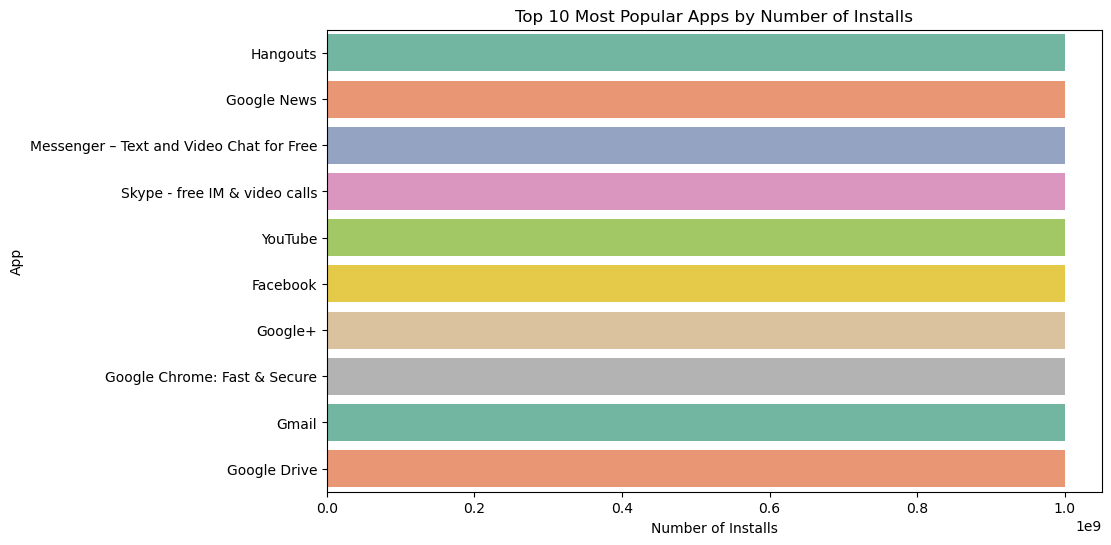

In [60]:
# Plotting the top 10 most popular apps
plt.figure(figsize=(10,6))
sns.barplot(data=top_10.reset_index(), x="Installs", y="App", palette='Set2')
plt.xlabel('Number of Installs')
plt.ylabel('App')
plt.title('Top 10 Most Popular Apps by Number of Installs')
plt.show()

### Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?

In [61]:
# Ill start analyzing Popular Categories
popular_catg= df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)
popular_catg

Category
COMMUNICATION         11039276251
GAME                  10897924415
FAMILY                 8870642505
TOOLS                  8102771915
PRODUCTIVITY           5788091369
SOCIAL                 5487867902
PHOTOGRAPHY            4658147655
VIDEO_PLAYERS          3917002720
TRAVEL_AND_LOCAL       2894887146
NEWS_AND_MAGAZINES     2369217760
Name: Installs, dtype: int64

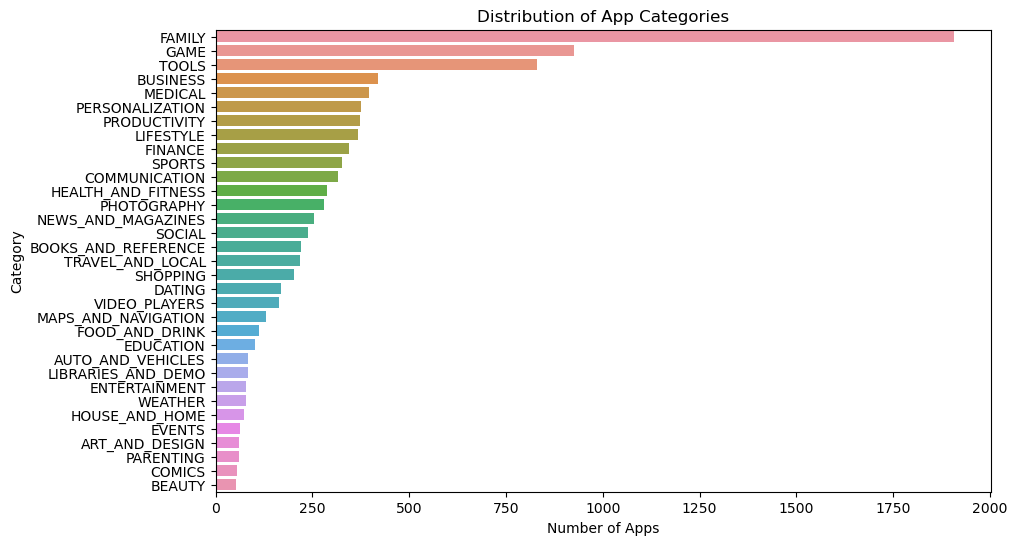

In [62]:
# Distribution of different app categories
plt.figure(figsize=(10, 6))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index)
plt.title('Distribution of App Categories')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.show()

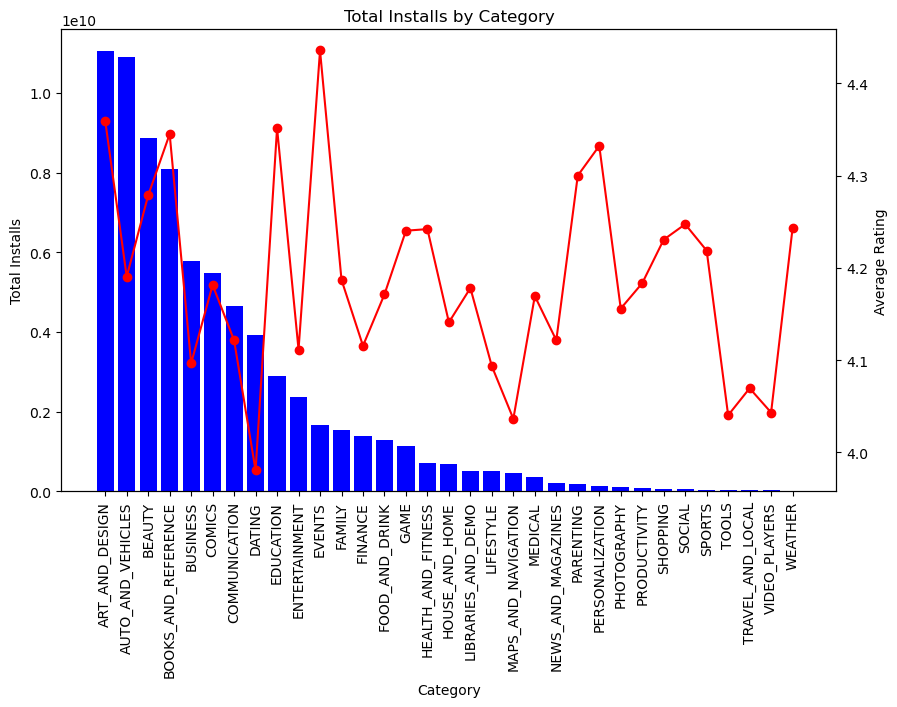

In [63]:
#It is important to analyze the category by total of instalations and the average of rating 
# Grouping data by category and aggregating total installs
installs_category = df.groupby('Category').agg({'Installs': 'sum'}).sort_values('Installs', ascending=False).reset_index()

# Bar chart for total installs by category
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(installs_category['Category'], installs_category['Installs'], color='blue')  # Changed color to lightgreen
ax1.set_xlabel('Category')
ax1.set_ylabel('Total Installs')
ax1.set_title('Total Installs by Category')
ax1.tick_params(axis='x', rotation=90)

# Line chart for average rating by category
avg_rating_by_category = df.groupby('Category').agg({'Rating': 'mean'}).reset_index()
ax2 = ax1.twinx()
ax2.plot(avg_rating_by_category['Category'], avg_rating_by_category['Rating'], marker='o', color='red')  # Changed color to orange
ax2.set_ylabel('Average Rating')
plt.show()

**Note:** This visualization suggests that while certain categories attract more users, their overall user satisfaction levels may vary.

### Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

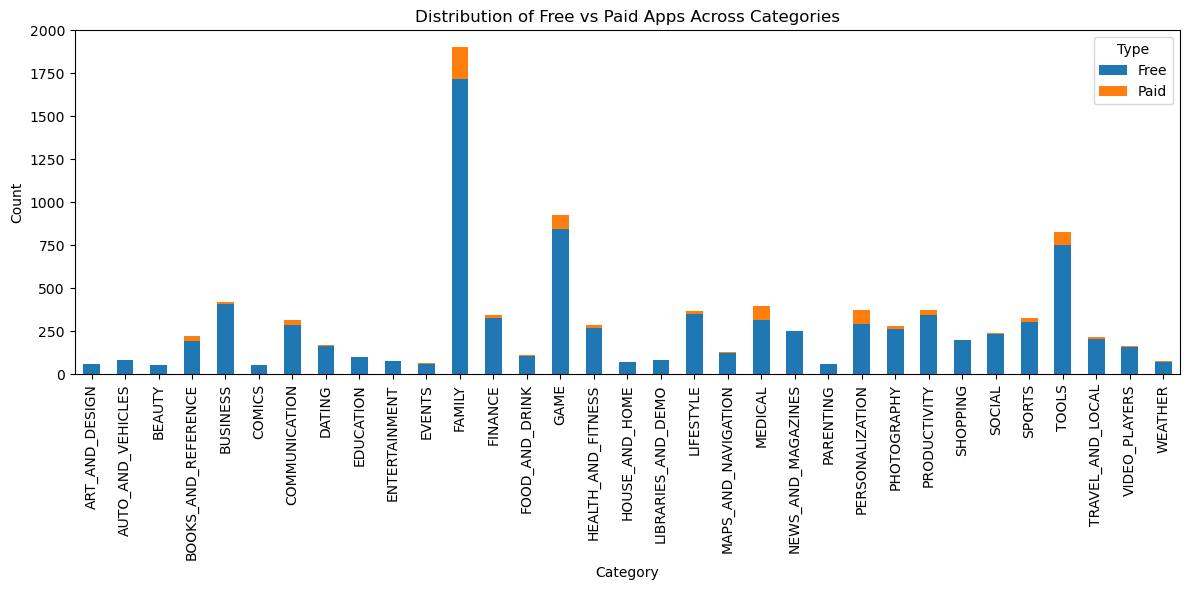

In [64]:
#Let's see the component of type of application.
# Stacked bar chart for distribution of free vs paid apps across categories
category_price_distribution = df.groupby(['Category', 'Type']).size().unstack()
category_price_distribution.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribution of Free vs Paid Apps Across Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Note:** Given that the majority of apps on the Google Play Store are free, the price may not be a decisive factor in assessing profitability. Instead, I will focus on analyzing the total number of installs and rating as key indicators of app success and popularity. Knowing that there are a significant number of apps, ill check only the apps with a median over 4 and 3o apps with more installations.

In [65]:
# Grouping data by app and summing up the installations
installs_per_app = df.groupby('App')['Installs'].sum()
ratings_per_app = df.groupby('App')['Rating'].mean()

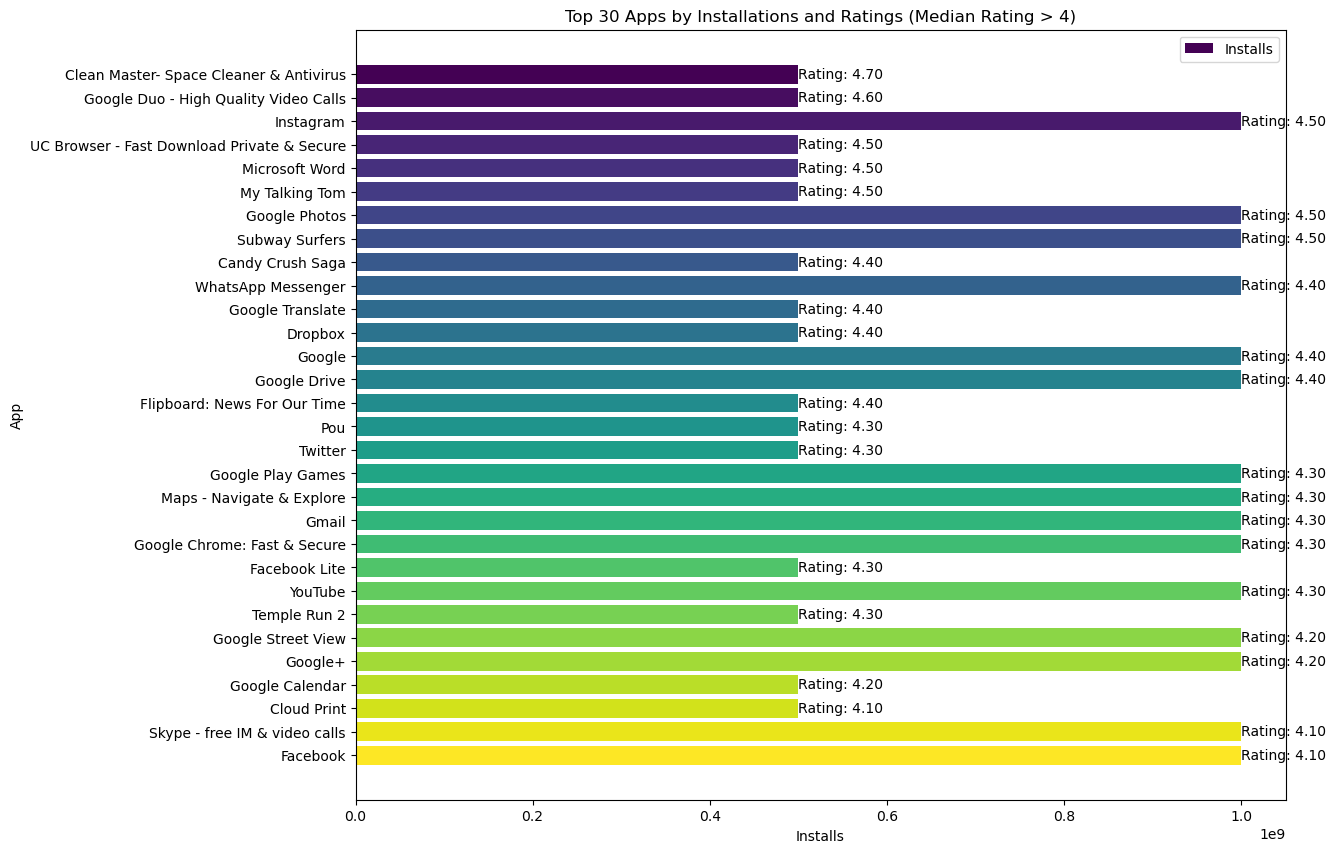

In [74]:
# Filter the DataFrame to include only apps with a median rating over 4
high_rated_apps = df.groupby('App')['Rating'].median() > 4
filtered_df = df[df['App'].isin(high_rated_apps[high_rated_apps].index)]

# Selecting the top 30 apps based on installations from the filtered DataFrame
top_30_apps = filtered_df.nlargest(30, 'Installs')

# Sorting the top 30 apps based on ratings
top_30_apps = top_30_apps.sort_values(by='Rating', ascending=False)

# Create a color map based on ratings
colors = plt.cm.viridis(np.linspace(0, 1, len(top_30_apps)))

# Create the bar plot
plt.figure(figsize=(12, 10))
plt.barh(top_30_apps['App'], top_30_apps['Installs'], color=colors, label='Installs')
plt.xlabel('Installs')
plt.ylabel('App')
plt.title('Top 30 Apps by Installations and Ratings (Median Rating > 4)')
plt.legend()

# Adding ratings as text beside each bar
for i, (app, installs, rating) in enumerate(zip(top_30_apps['App'], top_30_apps['Installs'], top_30_apps['Rating'])):
    plt.text(installs + 100000, i, f'Rating: {rating:.2f}', va='center')

plt.gca().invert_yaxis()  # Invert y-axis to display the app with the highest rating at the top
plt.show()


### Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

**Answer:** Without specific data indicating app launch dates, it's difficult to determine the best time for a new app launch. To make recommendations, we'd need information on app categories, user ratings, and download trends over time.